<a href="https://colab.research.google.com/github/priscillaopoku/DARA-40cm-Telescope/blob/main/Copy_of_DARA_40cm_photometry_Didymos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DARA 40cm Photometry Data Analysis

FOR DARA KENYA SCHOOL SEP 2024

v0.0 by Xueqing Chen, and Lekshmi
Rajagopal, Fengyuan Frey Liu on 23 Sep 2024.


In [ ]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import glob

Before you run the notebook, make sure the notebook and data are in the same directory. You can find the data needed for this exercise at: https://drive.google.com/drive/folders/1iUGC6lwJIyJzELhAVPHLZyhEfcHe8M2w?usp=sharing

In [ ]:
rawfiles = sorted(glob.glob(f'raws/Didymos_*.fits')) # glob.glob() searches for all files in a folder that matches with the pattern "Didymos_*.fits"
rawfiles # display the file names to make sure your path is fine

[]

In [ ]:
# Read the raw fits files in a loop

rawframes = [] # create an empty list to store the data frames
times = [] # create a list to store the time info from the header too

for i in range(len(rawfiles)):
    rawframes.append(fits.getdata(rawfiles[i]))
    times.append(fits.getheader(rawfiles[i])['DATE-OBS'])
rawframes = np.array(rawframes)

nframe = rawframes.shape[0] # number of frames

print('Number of frames:', nframe)
print('Shape of each frame:', (rawframes.shape[1], rawframes.shape[2]))
print('Time of each frame:', times)

Number of frames: 10
Shape of each frame: (1200, 1920)
Time of each frame: ['2022-09-26T23:09:16.6278435', '2022-09-26T23:13:40.7643196', '2022-09-26T23:14:57.8421026', '2022-09-26T23:16:19.8882050', '2022-09-26T23:17:37.9335000', '2022-09-26T23:20:11.0293162', '2022-09-26T23:22:37.1305150', '2022-09-26T23:26:28.2846297', '2022-09-26T23:31:35.4945465', '2022-09-26T23:38:53.7991911']


In [ ]:
# Format the observation times array
from astropy.time import Time

t = Time(times, format='isot', scale='utc', out_subfmt='date_hm') # create a Time object that makes it easy to convert the time format
mjds = t.mjd # convert to Modified Julian Date for a continuous time axis
print('mjds:', mjds)

timelabels = [] # get the time labels in the hh:mm format that we want to display
for label in t.iso:
    timelabels.append(label[-5:])
print('timelabels:', timelabels)

mjds: [59848.96477579 59848.96783292 59848.96872502 59848.96967463
 59848.97057793 59848.97234988 59848.97404086 59848.97671626
 59848.98027193 59848.9853449 ]
timelabels: ['23:09', '23:13', '23:14', '23:16', '23:17', '23:20', '23:22', '23:26', '23:31', '23:38']


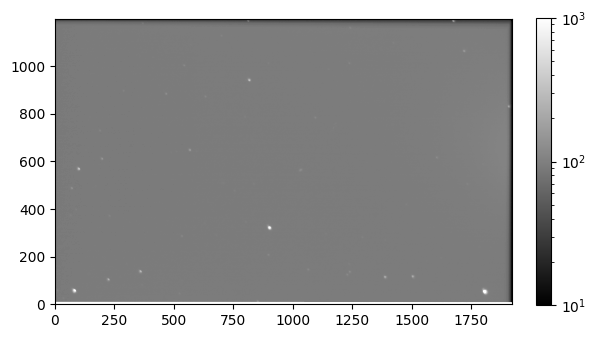

In [ ]:
# Look at the first raw frame
plt.imshow(rawframes[0], cmap='gray', norm=LogNorm(vmin=10, vmax=1000), origin='lower')
plt.colorbar(fraction=0.029);

Now let's perfom the calibration:

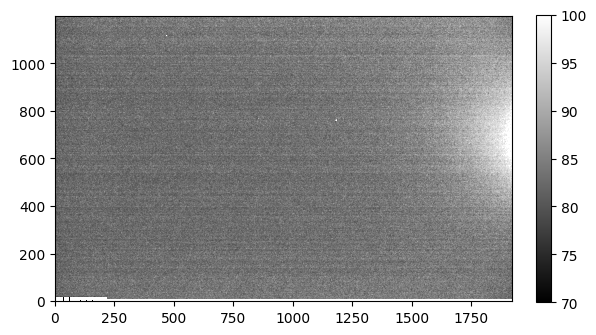

In [ ]:
# Open the dark frame
dark = fits.getdata(f"masterdark.fits")
plt.imshow(dark, cmap='gray', vmin=40, vmax=100, origin='lower')
plt.colorbar(fraction=0.029);

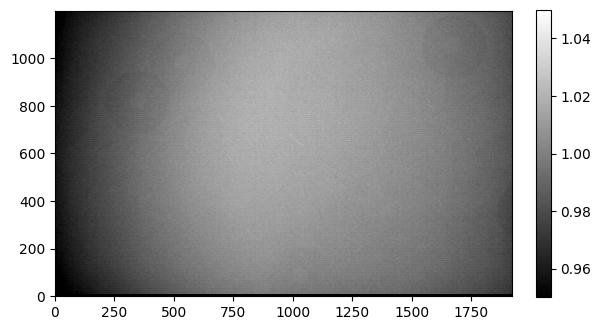

In [ ]:
# Open and normalize the flat frame
flat = fits.getdata(f"masterflat.fits")
flat_normed = flat / np.nanmedian(flat) # normalize the flat
flat_normed[flat_normed==0] = 1e-5 # replace zeros in flat by a small number
plt.imshow(flat_normed, cmap='gray', vmin=0.95, vmax=1.05, origin='lower')
plt.colorbar(fraction=0.029);

The following cell is a concise version of the calibration demo notebook we showed earlier (https://colab.research.google.com/drive/1E9Rp5LhRq3dEloLCwSK2wodUoPJFmsrI?usp=sharing). Your data consists of a number of raw images which will each have to be reduced individually. This can be done using a loop which runs through each raw file and applies the dark and flat correction.

/var/folders/jm/dmx123p56254c5gy18wgtyh00000gn/T/ipykernel_95828/2121855835.py:4: RuntimeWarning: invalid value encountered in cast
  reducedframes[i] = (rawframes[i] - dark*0.7) / flat_normed


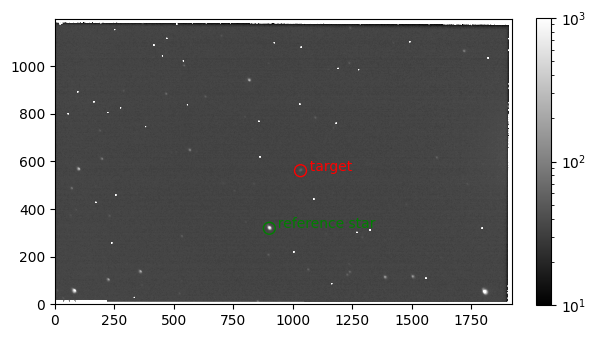

In [ ]:
# Perfom the calibration in a loop

reducedframes = np.zeros_like(rawframes) # create an empty array to store the reduced frames

for i in range(rawframes.shape[0]):
    reducedframes[i] = (rawframes[i] - dark) / flat_normed # subtract the dark and divide by flat

# Look at the first reduced frame
plt.imshow(reducedframes[0], cmap='gray', norm=LogNorm(vmin=10, vmax=1000), origin='lower')

# add a circle where the asteroid is
plt.gca().add_patch(plt.Circle((1032, 561), 25, fill=False, color='r'))
plt.text(1032, 561 , '  target', color='r', fontsize=10)

# add a circle where the reference star is
plt.gca().add_patch(plt.Circle((901, 319), 25, fill=False, color='g'))
plt.text(901, 319 , '  reference star', color='g', fontsize=10)

plt.colorbar(fraction=0.029);

# Analysis Part

For the data analysis, we want to perform aperture photometry on each reduced frame to measure the change in flux of the asteroid Didymos. We also want to repeat this on a background star as a photometric reference.

For this, we need to know the x and y position of the target (Didymos) and the reference star on each frame. To find their position, you can open each raw fits file in DS9 and move your mouse over the target / ref star to find it's position. Then, fill in the x and y coordinate you read from DS9 in the following blanks:

In [ ]:
# Set the x, y coordinates of the target
xy_target = [
    (1032, 561), # x, y coordinates of the target for 1st frame
    (), # fill in  the x, y coordinates of the target for 2nd frame
    (), # ... (answer in the last cell)
    (),
    (),
    (),
    (),
    (),
    (),
    (),
]

# Set the x, y coordinates of the reference star
xy_ref = [
    (901, 319), # x, y coordinates of the reference star for 1st frame
    (), # fill in the x, y coordinates of the reference star for 2nd frame
    (), # ...
    (),
    (),
    (),
    (),
    (),
    (),
    ()
]

'''
# You can also use more ref stars...
xy_ref1 = [
    (1387, 114), # x, y coordinates of another reference star for 1st frame
    (1427, 222), # ...
    (),
    (),
    (),
    (),
    (),
    (),
    (),
    ()
]
'''

Now let's define an aperture on the target and an aperture on the ref star. Also define a ring around the apertures for estimating and subtracting the sky background.

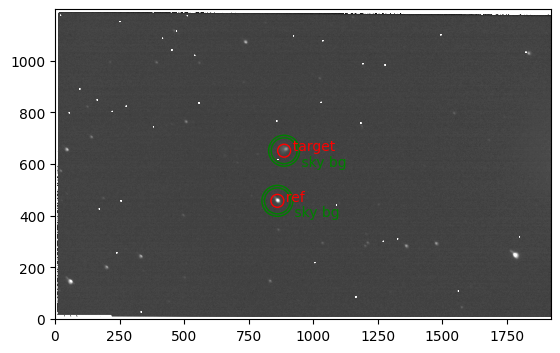

In [ ]:
# Set aperture size
r_aper_target = 25 # radius of the aperture for the target star in pixels
r_aper_ref = 25    # radius of the aperture for the reference star in pixels
r_sky_inner = 50   # inner radius of the sky annulus in pixels
r_sky_outer = 60   # outer radius of the sky annulus in pixels

# Let's plot where the aperture and sky annulus are
n=0
plt.imshow(reducedframes[n], cmap='gray', origin='lower',norm=LogNorm(vmin=10, vmax=1000))
plt.gca().add_patch(plt.Circle(xy_target[n], r_aper_target, fill=False, color='r'))
plt.gca().add_patch(plt.Circle(xy_target[n], r_sky_inner, fill=False, color='g'))
plt.gca().add_patch(plt.Circle(xy_target[n], r_sky_outer, fill=False, color='g'))
plt.text(xy_target[n][0], xy_target[n][1], '  target', color='r', fontsize=10)
plt.text(xy_target[n][0], xy_target[n][1]-60, '    sky bg', color='g', fontsize=10)

plt.gca().add_patch(plt.Circle(xy_ref[n], r_aper_ref, fill=False, color='r'))
plt.gca().add_patch(plt.Circle(xy_ref[n], r_sky_inner, fill=False, color='g'))
plt.gca().add_patch(plt.Circle(xy_ref[n], r_sky_outer, fill=False, color='g'))
plt.text(xy_ref[n][0], xy_ref[n][1], '  ref', color='r', fontsize=10)
plt.text(xy_ref[n][0], xy_ref[n][1]-60, '    sky bg', color='g', fontsize=10);

Now we sum up the flux in each aperture and subtract it by the sky background level to get the flux of the target! Note that you need to multiple the sky background level (in counts/pixel) by the area of your aperture.

In [ ]:
# Perform aperture photometry of the target

fluxes_target = [] # make a emtpy list to store the fluxes

for n in range(len(reducedframes)): # Loop over all frames
    img = reducedframes[n]

    x, y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
    xcen, ycen = xy_target[n]
    aper_target = ((x - xcen)**2 + (y - ycen)**2 <= r_aper_target**2) # Define the aperture as a circle
    aper_target_area = len(np.argwhere(aper_target)) # Calculate the area of the aperture

    aper_sky = ((x - xcen)**2 + (y - ycen)**2 <= r_sky_outer**2) * ((x - xcen)**2 + (y - ycen)**2 >= r_sky_inner**2) # Define the sky annulus
    aper_sky_area = len(np.argwhere(aper_sky)) # Calculate the area of the sky annulus

    flux_total = np.sum(img[aper_target]) # Calculate the total flux in the target aperture
    flux_skybg = np.median(img[aper_sky]) # Calculate the average sky background level
    flux_target = flux_total - flux_skybg * aper_target_area # Subtract the sky background from the total flux

    print('Target Frame', n)
    print(f'The area of the aperture is {aper_target_area} pixels.')
    print(f'The area of the sky annulus is {aper_sky_area} pixels.')
    print(f'The sky background level is {flux_skybg:.0f} counts/pixel.')
    print(f'The total flux in aperture is {flux_total:.0f} counts.')
    print(f'The sky counts in aperture is {flux_skybg * aper_target_area:.0f} counts.')
    print(f'The target flux after sky subtraction is {flux_target:.0f} counts.')

    fluxes_target.append(flux_target)

Target Frame 0
The area of the aperture is 1961 pixels.
The area of the sky annulus is 3464 pixels.
The sky background level is 43 counts/pixel.
The total flux in aperture is 86055 counts.
The sky counts in aperture is 84323 counts.
The target flux after sky subtraction is 1732 counts.
Target Frame 1
The area of the aperture is 1961 pixels.
The area of the sky annulus is 3464 pixels.
The sky background level is 43 counts/pixel.
The total flux in aperture is 85393 counts.
The sky counts in aperture is 84323 counts.
The target flux after sky subtraction is 1070 counts.
Target Frame 2
The area of the aperture is 1961 pixels.
The area of the sky annulus is 3464 pixels.
The sky background level is 43 counts/pixel.
The total flux in aperture is 86041 counts.
The sky counts in aperture is 84323 counts.
The target flux after sky subtraction is 1718 counts.
Target Frame 3
The area of the aperture is 1961 pixels.
The area of the sky annulus is 3464 pixels.
The sky background level is 43 counts/p

Now let's repeat aperture photometry on the ref star:

In [ ]:
# Perform aperture photometry of the ref star
fluxes_ref = []
for n in range(len(reducedframes)):
    img = reducedframes[n]
    x, y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
    xcen, ycen = xy_ref[n]
    aper_ref = # fill in this line by yourself, based on what you understand from the previous cell about the target
    aper_ref_area = len(np.argwhere(aper_ref))

    aper_sky = ((x - xcen)**2 + (y - ycen)**2 <= r_sky_outer**2) * ((x - xcen)**2 + (y - ycen)**2 >= r_sky_inner**2)
    aper_sky_area = len(np.argwhere(aper_sky))

    flux_total = np.sum(img[aper_ref])
    flux_skybg = np.median(img[aper_sky])
    flux_ref = flux_total - flux_skybg * aper_ref_area

    print("Ref star Frame", n)
    print(f'The area of the aperture is {aper_ref_area} pixels.')
    print(f'The area of the sky annulus is {aper_sky_area} pixels.')
    print(f'The sky background level is {flux_skybg:.0f} counts/pixel.')
    print(f'The total flux in aperture is {flux_total:.0f} counts.')
    print(f'The sky counts in aperture is {flux_skybg * aper_ref_area:.0f} counts.')
    print(f'The ref star flux after sky subtraction is {flux_ref:.0f} counts.')

    fluxes_ref.append(flux_ref)

Ref star Frame 0
The area of the aperture is 1961 pixels.
The area of the sky annulus is 3464 pixels.
The sky background level is 43 counts/pixel.
The total flux in aperture is 179404 counts.
The sky counts in aperture is 84323 counts.
The ref star flux after sky subtraction is 95081 counts.
Ref star Frame 1
The area of the aperture is 1961 pixels.
The area of the sky annulus is 3464 pixels.
The sky background level is 43 counts/pixel.
The total flux in aperture is 178926 counts.
The sky counts in aperture is 84323 counts.
The ref star flux after sky subtraction is 94603 counts.
Ref star Frame 2
The area of the aperture is 1961 pixels.
The area of the sky annulus is 3464 pixels.
The sky background level is 43 counts/pixel.
The total flux in aperture is 180225 counts.
The sky counts in aperture is 84323 counts.
The ref star flux after sky subtraction is 95902 counts.
Ref star Frame 3
The area of the aperture is 1961 pixels.
The area of the sky annulus is 3464 pixels.
The sky background 

Now we have stored the target and ref star flux values of each frame. Let's plot them against the observation times to make a lightcurve!

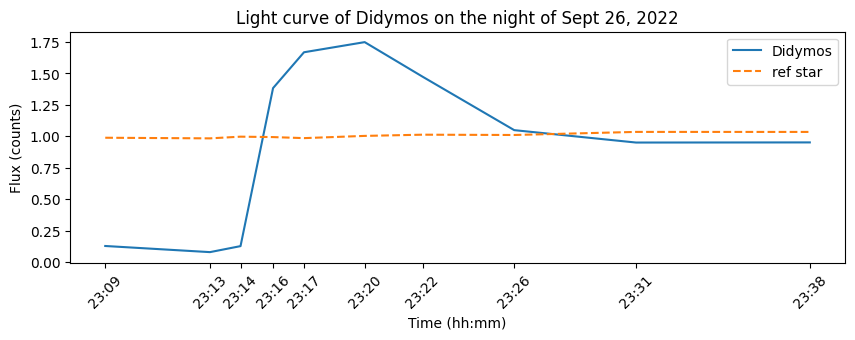

In [ ]:
# Let's normalize the fluxes before we plot it, so that we can better compare the light curves
fluxes_target = np.array(fluxes_target)
fluxes_ref = np.array(fluxes_ref)
fluxes_target = fluxes_target / np.median(fluxes_target)
fluxes_ref = fluxes_ref / np.median(fluxes_ref)

# Plot light curves of target and ref star
plt.figure(figsize=(10, 3))
plt.plot(mjds, fluxes_target, label='Didymos')
plt.plot(mjds, fluxes_ref, '--', label='ref star')
plt.xlabel('Time (hh:mm)')
plt.xticks(ticks=mjds, labels=timelabels, rotation=45)
plt.ylabel('Flux (counts)')
plt.title('Light curve of Didymos on the night of Sept 26, 2022')
plt.legend();

On 26 September 2022, the Double Asteroid Redirection Test (DART) spacecraft struck Dimorphos, a satellite of the asteroid Didymos. Here we see a burst of flux when the impact happened and materials were ejected from its surface!

In [ ]:
# answer to the coordinate measurements
xy_target = [
    (1032, 561), # x, y coordinates of the target for first frame
    (1023, 642), # fill in  the x, y coordinates of the target for second frame
    (995, 637),  # ...
    (946, 640),
    (915, 643),
    (887, 652),
    (852, 680),
    (813, 655),
    (696, 666),
    (588, 640),
]

# Set the x, y coordinates of the reference star
xy_ref = [
    (901, 319), # x, y coordinates of the reference star for 1st frame
    (935, 416), # fill in the x, y coordinates of the reference star for 2nd frame
    (918, 416), # ...
    (881, 424),
    (864, 433),
    (861, 458),
    (844, 490),
    (830, 487),
    (761, 524),
    (710, 541)
]
